In [2]:
%cd "C:\Users\mspurrie\Desktop\Python Scripts\"

C:\Users\mspurrie\Desktop\Python Scripts


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Jump-Start for the Bank Marketing Study
# as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)

# jump-start code revised by Thomas W. Milller (2018/10/07)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [13]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

In [16]:
# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [17]:
# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


In [18]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [19]:
# look at the beginning of the DataFrame
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

In [21]:
# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

In [22]:
# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

In [23]:
# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

In [24]:
# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [25]:
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

In [26]:
# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


## EDA


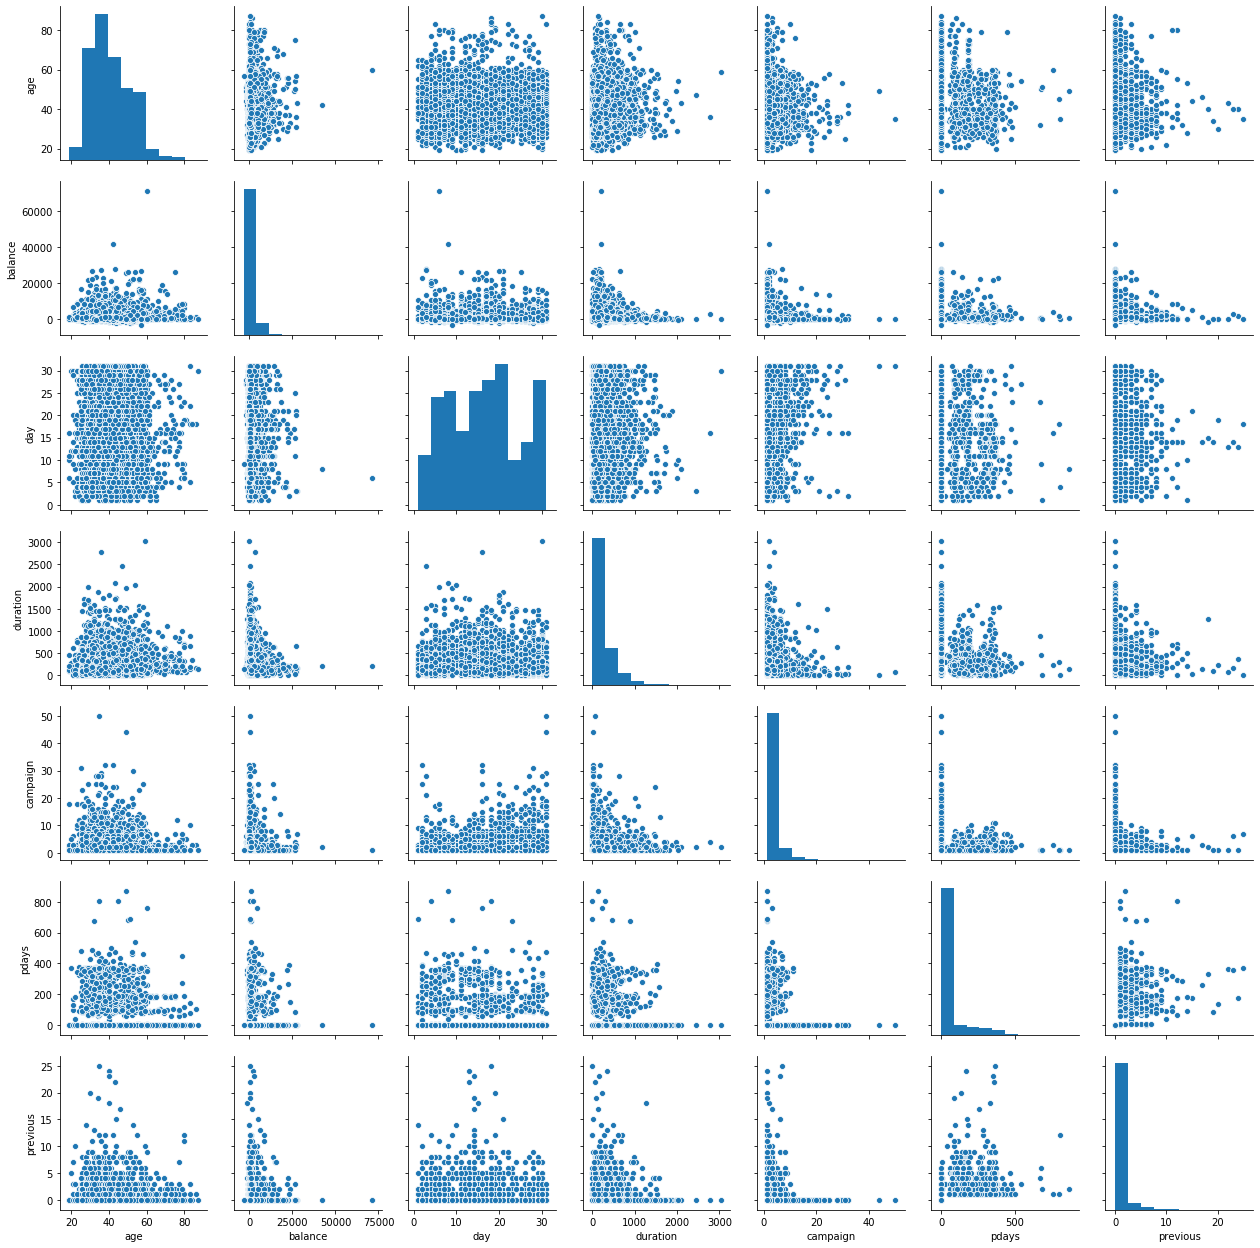

In [100]:
#using pairplot to compare varaibles
sns.pairplot(data = bank)

It looks like most variables are right skewed looking at the distribution plot. Only age follows a normalish distribution. Balance looks to have a negative correlation with duration, campaign, pday, previous. Going to examine those more closely.

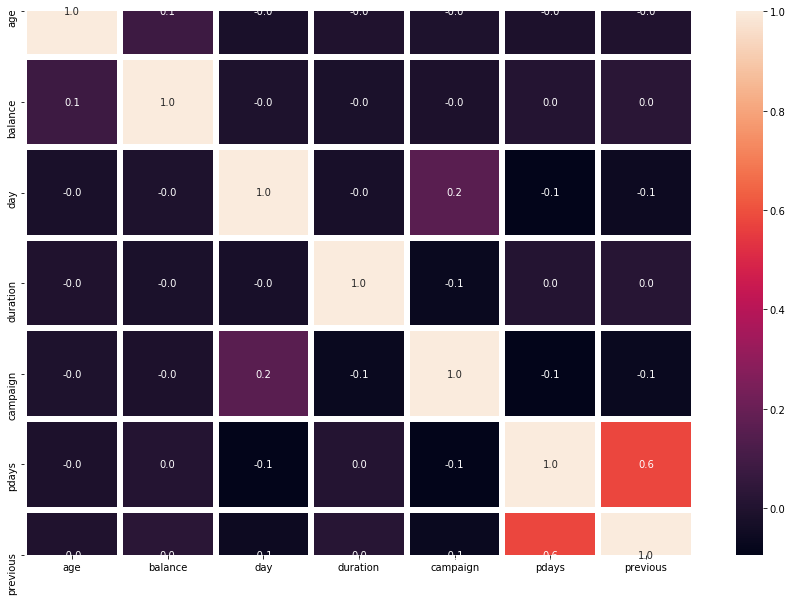

In [101]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(bank.corr(),linewidths=5,fmt='.1f',ax=ax, annot = True)
plt.show()

Looks like there is not a lot of correlation among the varialbes, good since it reduces the possibility of multicollinearity. Only pdays and previous have higher correlation which makes sense because pdays means days since previous contact and previous is the number of contacts for the client in a previous campaign.

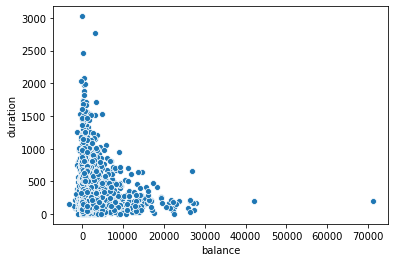

In [102]:
sns.scatterplot('balance','duration', data = bank)

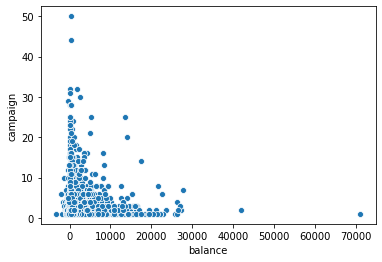

In [103]:
sns.scatterplot('balance','campaign', data = bank)

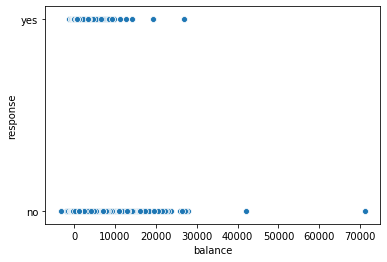

In [104]:
sns.scatterplot('balance','response', data = bank)

In [115]:
bank.info

<bound method DataFrame.info of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  dura

In [118]:
bank[bank['response'] == 'yes'].count()

age          521
job          521
marital      521
education    521
default      521
balance      521
housing      521
loan         521
contact      521
day          521
month        521
duration     521
campaign     521
pdays        521
previous     521
poutcome     521
response     521
dtype: int64

In [123]:
bank[bank['response'] == 'no'].count()

age          4000
job          4000
marital      4000
education    4000
default      4000
balance      4000
housing      4000
loan         4000
contact      4000
day          4000
month        4000
duration     4000
campaign     4000
pdays        4000
previous     4000
poutcome     4000
response     4000
dtype: int64

Many more No, than Yes

In [125]:
bank[bank['poutcome'] == 'success'].count()

age          129
job          129
marital      129
education    129
default      129
balance      129
housing      129
loan         129
contact      129
day          129
month        129
duration     129
campaign     129
pdays        129
previous     129
poutcome     129
response     129
dtype: int64

In [126]:
bank[bank['poutcome'] != 'success'].count()

age          4392
job          4392
marital      4392
education    4392
default      4392
balance      4392
housing      4392
loan         4392
contact      4392
day          4392
month        4392
duration     4392
campaign     4392
pdays        4392
previous     4392
poutcome     4392
response     4392
dtype: int64

The previous campgain was even less successful than the current one.

In [202]:
bank[bank['default'] == 'no'].count()

age          4445
job          4445
marital      4445
education    4445
default      4445
balance      4445
housing      4445
loan         4445
contact      4445
day          4445
month        4445
duration     4445
campaign     4445
pdays        4445
previous     4445
poutcome     4445
response     4445
dtype: int64

In [203]:
bank[bank['default'] == 'yes'].count()

age          76
job          76
marital      76
education    76
default      76
balance      76
housing      76
loan         76
contact      76
day          76
month        76
duration     76
campaign     76
pdays        76
previous     76
poutcome     76
response     76
dtype: int64

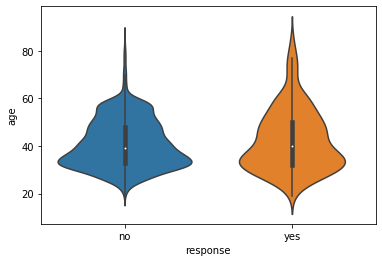

In [129]:
sns.violinplot('response','age', data = bank)
#many more older people saying yes than no

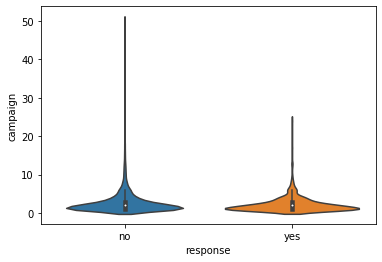

In [149]:
sns.violinplot('response','campaign', data = bank)
#no real difference here

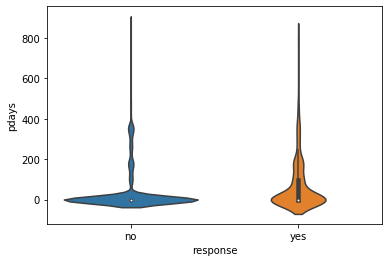

In [150]:
sns.violinplot('response','pdays', data = bank)

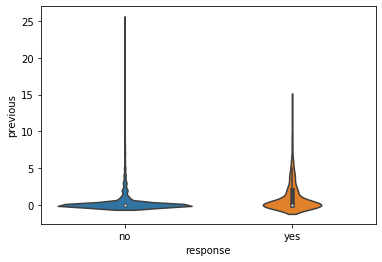

In [151]:
sns.violinplot('response','previous', data = bank)
#looks like with several variables, the first contact gives the most yes and no, but more people respond yes if they
#have had a previous contact

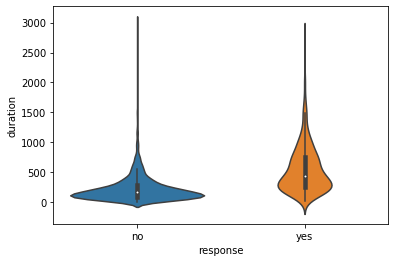

In [152]:
sns.violinplot('response','duration', data = bank)
#longer duration contacts yield more yes responses

In [142]:
#ry is a dataframe of response == yes, rn is a dataframe of response == no so I can analyze any differences or look for patterns
#for the different responses. Not strictly necessary, but could be interesting.
ry = bank[bank['response'] == 'yes']
rn = bank[bank['response'] == 'no']

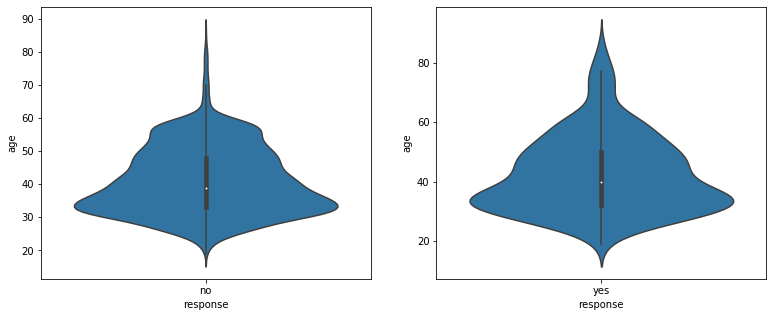

In [146]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.violinplot('response', 'age', data = rn, ax = ax1)
sns.violinplot('response', 'age', data = ry, ax = ax2)

## Models
Logistic and Naive Bayes

In [85]:
print(model_data.shape)

(4521, 4)


#### Log Model Method 1

In [176]:
#convertive model_data to dataframe to separate response and independant variables
model_df = pd.DataFrame(model_data)
X = model_df.iloc[:,1:-1] #independant variables
y = model_df.iloc[:,-1] #response variable

#may use this later

In [166]:
#trying to to the split using indices for the model_data array
X1 = model_df.iloc[:,1:-1] #independant variables
y1 = model_df.iloc[:,-1]
X_train1, X_test1, y_train1, y_test1 = X1[:3700], X1[3700:], y1[:3700], y1[3700:]

In [164]:
#determining how to do the split ~80/20
3700/4521

0.8184030081840301

In [178]:
#running a log model
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression() 
logmodel1.fit(X_train1,y_train1)
logpred1 = logmodel1.predict(X_test1)

#confusion matrix, accuracy score, and cross validation
print(confusion_matrix(y_test1, logpred1))
print(round(accuracy_score(y_test1, logpred1),2)*100)
LOGCV1 = (cross_val_score(logmodel1, X_train1, y_train1, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(LOGCV1)

[[710   0]
 [111   0]]
86.0
0.8891891891891893


High number of false negatives with Method 1 and no true negatives detected. 710 true negatives, 0 false positives, 111 false negatives, 0 true positives. Not a very good model. However, the cross validation score is a bit better with ~89% accuracy, so the model can be improved, but isn't terrible depending on what is more important. All this model can tell us is with decent accuracy who will say no, but not who will say yes. The point of the model is to predict who will say yes.

#### Naive Bayes Method 1

In [182]:
from sklearn.naive_bayes import BernoulliNB
nbclf = BernoulliNB()
nbclf.fit(X_train1,y_train1)
nbclfpred = nbclf.predict(X_test1)

print(confusion_matrix(y_test1, nbclfpred))
print(round(accuracy_score(y_test1, nbclfpred),2)*100)
#NBCV = (cross_val_score(nbclfpred, X_train1, y_train1, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[710   0]
 [111   0]]
86.0


In [183]:
#split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data, response, test_size = 0.3, random_state = 101)

#imports for model creation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [184]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1202    0]
 [ 155    0]]
89.0


### Precision, Recall and ROC

In [185]:
from sklearn.metrics import precision_score, recall_score
print('precision ', precision_score(y_test, logpred))

print('recall ', recall_score(y_test, logpred))

precision  0.0
recall  0.0


In [186]:
#F1 score, combining Precision and Recall
from sklearn.metrics import f1_score
print('f1_score ', f1_score(y_test, logpred))

f1_score  0.0


In [187]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, logpred)

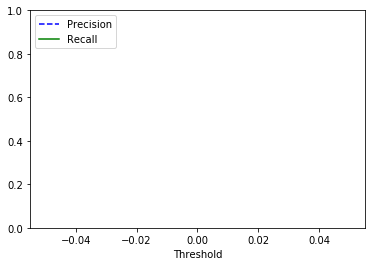

In [188]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [189]:
#ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logpred)

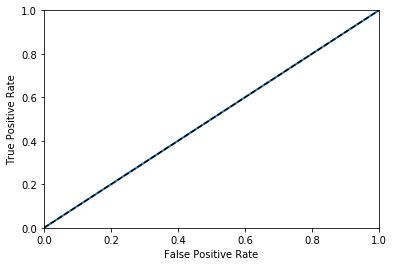

In [190]:
#plot of the ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

## From code examples online - this seems to work correctly

In [92]:
# shuffle the rows 
np.random.seed(RANDOM_SEED)
np.random.shuffle(model_data)

In [94]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score  

In [95]:
# list of names for classifier models
classifier_names = ["Logistic_Regression", "Naive_Bayes"]

# list of classifiers
classifiers = [LogisticRegression(), BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False)]

In [199]:
# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
crossvalidation_results = np.zeros((N_FOLDS, len(classifier_names)))

# kf, object,  model selection kfold split set up
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

#--check the splitting process by looking at fold observation counts--
# fold count initialized to zero
index_for_fold = 0

In [200]:
# splits the data, fits the classifier models, returns the crossvalidation
# results
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
    # 0:model_data.shape[1]-1 slices for explanatory variables,
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    
    # model_data.shape[1]-1 is the index for the response variable
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]
    
    # prints structure of data after split for x, y 
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    # index for method initialized to zero
    index_for_method = 0
    
    # loops through classifiers
    # fits the respective model
    # performs predictions
    for name, clf in zip(classifier_names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        
         # fit current classifier model using train data set
        clf.fit(X_train, y_train) 
        
        # calculate predictions to evaluate, using test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        
        # calculates ROC AUC score, stores results in cv_results
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1])
        print('Area under ROC curve:', fold_method_result)
        crossvalidation_results[index_for_fold, index_for_method] = fold_method_result
        
        
        # adds one to the index, next loop will be the next classifier
        index_for_method += 1
        
    # adds one to the index, next loop will be the next split in fold    
    index_for_fold += 1


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Area under ROC curve: 0.5634307903152124

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5634307903152124

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,

In [98]:
# pandas DataFrame gets assigned cross fold evaluation results
crossvalidation_results_df = pd.DataFrame(crossvalidation_results)
crossvalidation_results_df.columns = classifier_names
with open("cv-results-df.txt", "w") as text_file:
    text_file.write('\nResults from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                     '\nMethod Area under ROC Curve:\n'+ 
                     str(crossvalidation_results_df))

In [99]:
# print mean of ROC AUC evaluation results for each classifier, saves to file
print('\n----------------------------------------------')
print('\nAverage results from {}-fold cross-validation\n\nMethod Area under ROC Curve:\n{}'
      .format(str(N_FOLDS),str(crossvalidation_results_df.mean())), sep = '')     
print('\nMean of cross validation result:\n{}'.format(crossvalidation_results_df.mean())) 
with open("cv-results-df-mean.txt", "w") as text_file:
    text_file.write('\nAverage results from {}-fold cross-validation\n\nMethod Area under ROC Curve:\n{}'
                    .format(str(N_FOLDS),str(crossvalidation_results_df.mean())))



----------------------------------------------

Average results from 10-fold cross-validation

Method Area under ROC Curve:
Logistic_Regression    0.607916
Naive_Bayes            0.608131
dtype: float64

Mean of cross validation result:
Logistic_Regression    0.607916
Naive_Bayes            0.608131
dtype: float64


In [218]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clfpred = forest_clf.predict(X_test)

In [224]:
print(confusion_matrix(y_test, forest_clfpred))
print(round(accuracy_score(y_test, forest_clfpred),2)*100)

[[393   0]
 [ 59   0]]
87.0
